In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1438 - accuracy: 0.9556
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0468 - accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0340 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0259 - accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0199 - accuracy: 0.9935


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0421 - accuracy: 0.9879


In [14]:
print(test_acc)

0.9879000186920166


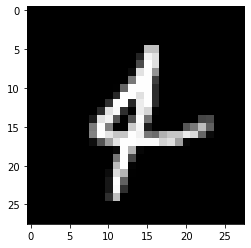

In [12]:
test_image = np.expand_dims(test_images[300],axis = 0)
plt.imshow(test_image.reshape(28,28), cmap='gray')
plt.show()

In [13]:
result = model.predict(test_image)
print("result:", result)
print("result.argmax():", result.argmax())

result: [[4.1317048e-09 6.9623621e-07 2.9491505e-06 1.0540362e-11 9.9999344e-01
  1.4904878e-09 2.8984968e-07 8.5449892e-07 1.7429185e-06 1.0875361e-08]]
result.argmax(): 4
